In [37]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [38]:
#Read the file into a DataFrame
data=pd.read_csv('Customer_churn.csv')
pd.set_option('max_columns',None)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
data.shape

(7043, 21)

In [40]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

There are 7043 rows and 21 columns in the dataset. 'Churn' is the target variable. Problem statement is to predict the customer churn 
as 'Yes' or 'No'. This is a binary classification problem.

In [41]:
#Check for null values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no missing data in the dataset.

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

'TotalCharges' is object type though it has continous values. So there is some problem with 'TotalCharges'

In [43]:
data[data['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


We can see that there are empty spaces in the 'TotalCharges' column. Also 'tenure' has zero values corresponding to these empty spaces even though 'MonthlyCharges' has values.

In [44]:
#Relace empty space in 'TotalCharges' with Nan values
data['TotalCharges']=data['TotalCharges'].replace(" ",np.nan)

In [45]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

It can be seen that 'TotalCharges' has 11 missing values

In [57]:
#Convert the datatype of 'TotalCharges' to float
data['TotalCharges']=data['TotalCharges'].astype(float)

In [46]:
#Remove the rows with missing values 
data.dropna(axis=0,how='any',inplace=True)

In [47]:
data.shape

(7032, 21)

In [48]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Null Values are treated

In [58]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Customers on an average are staying for 32months and paying charges 64/month.

# Data Visualisation

In [50]:
list_nominal=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']

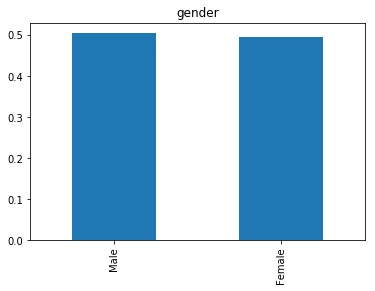

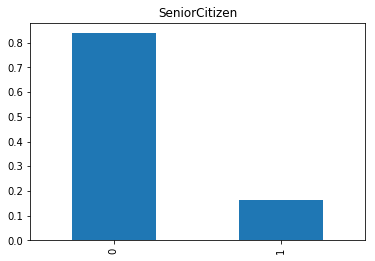

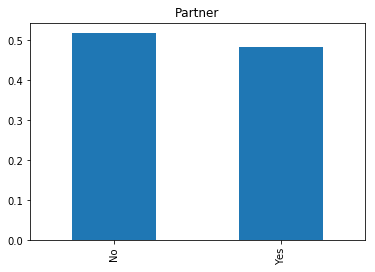

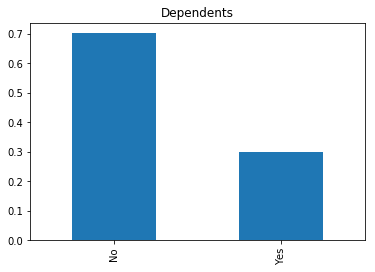

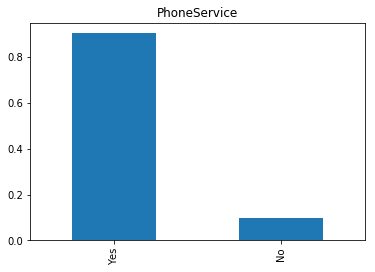

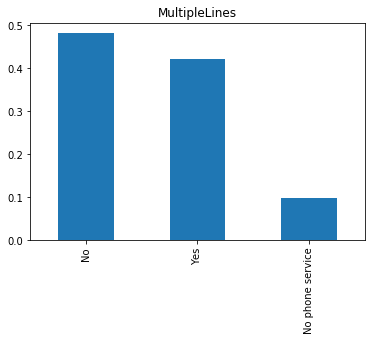

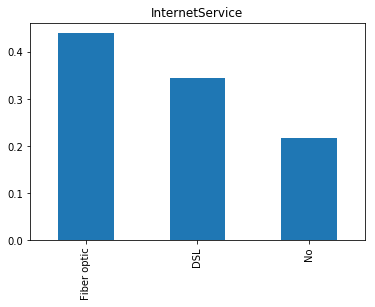

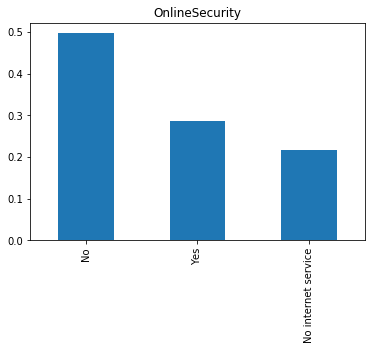

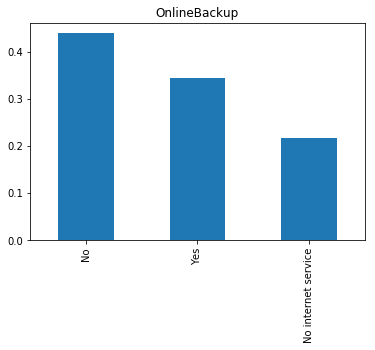

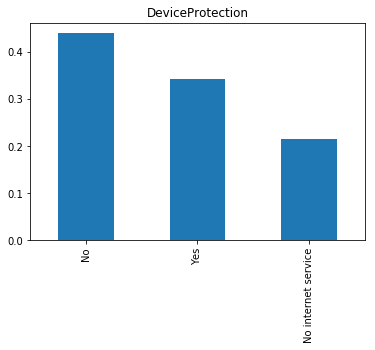

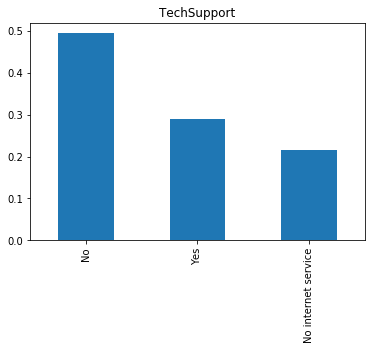

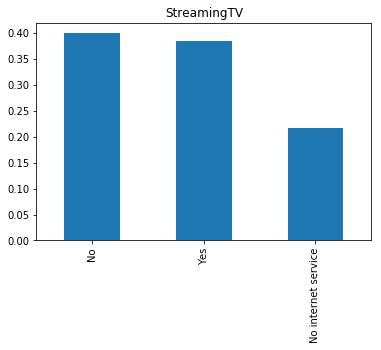

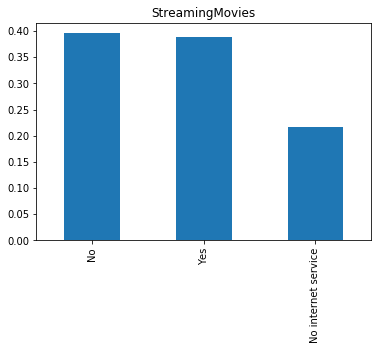

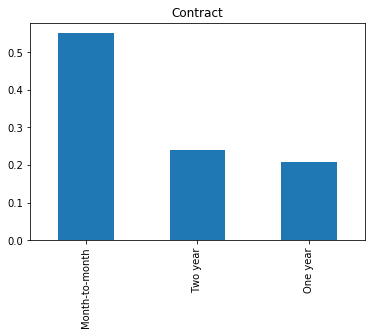

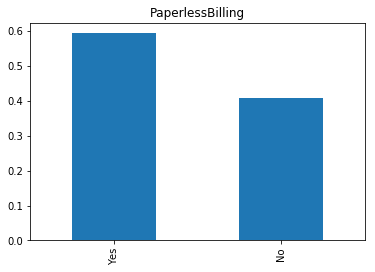

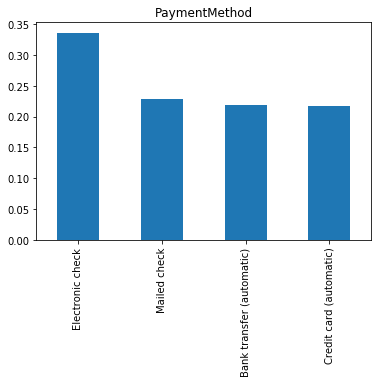

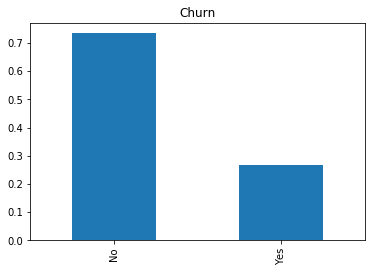

In [59]:
#Analyse the nominal categorical columns
for i in list_nominal:
    plt.subplots(1,1)
    data[i].value_counts(normalize=True).plot(kind='bar')
    plt.title(i)

Dataset has almost equal proportion of male and female customers.

There is more younger population in the dataset.

Half of the customers have partner and not many customers seem to have dependents

Most of the customers have phoneservice. Almost half of the customers have multiple lines.

Majority of the customers opted for fibre optic internet service

Majority of the customers are on a month to month contract.

Most of them opted for paperless billing.




In [60]:
data['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

Dataset is imbalnced

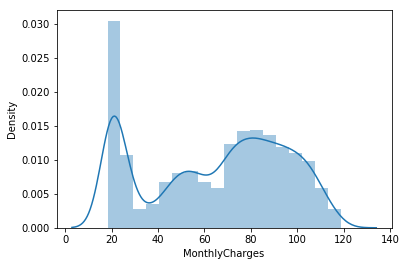

In [61]:
#Check the distribution of continous columns
sns.distplot(data['MonthlyCharges'],kde=True)

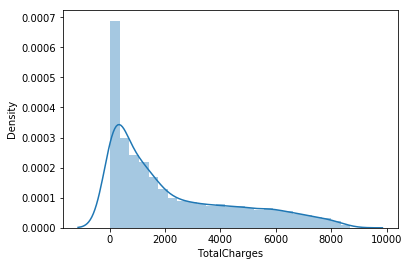

In [62]:
sns.distplot(data['TotalCharges'],kde=True)

Data is right skewed

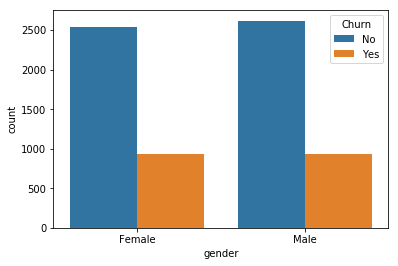

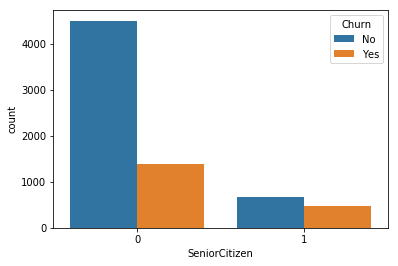

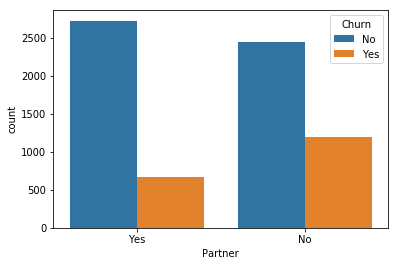

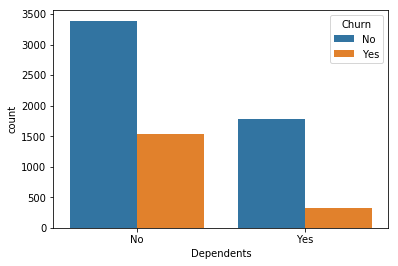

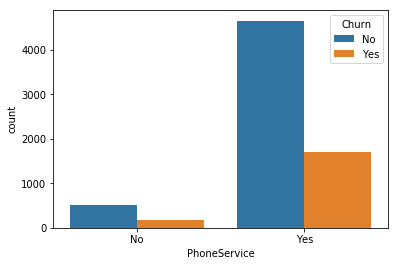

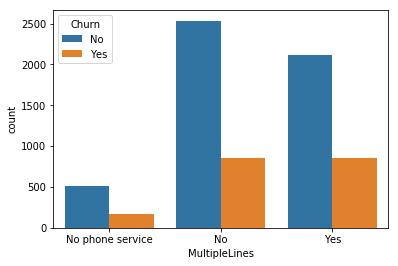

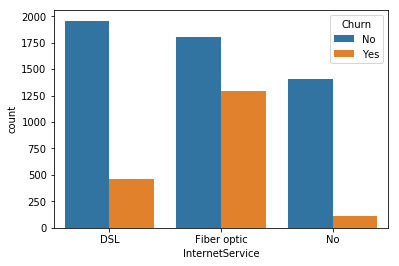

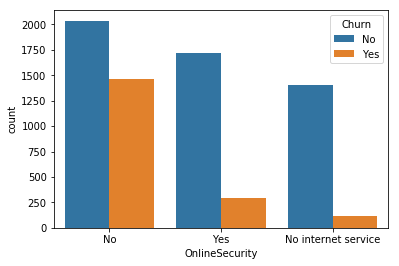

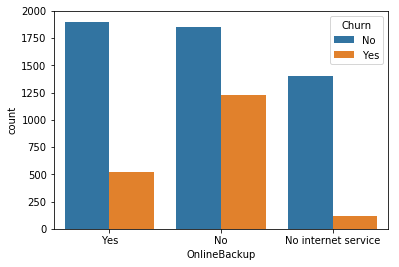

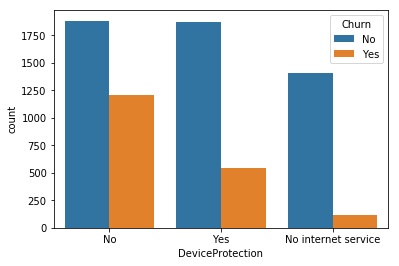

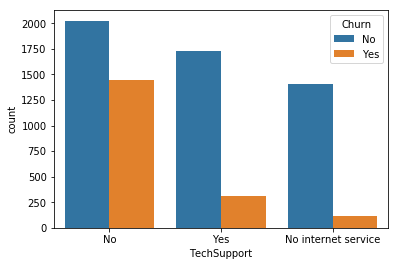

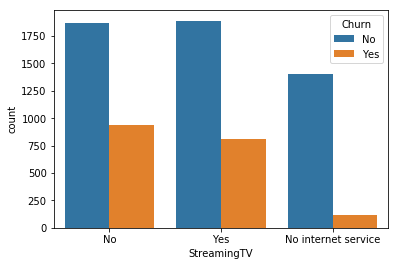

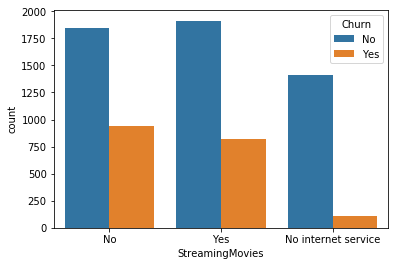

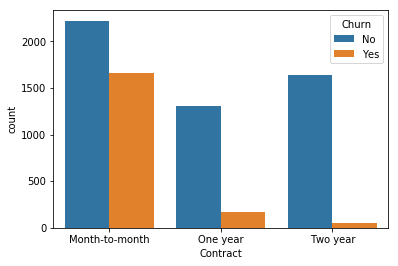

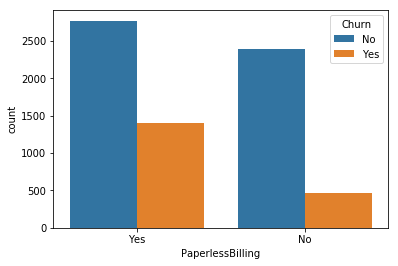

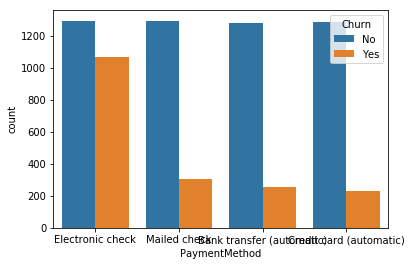

In [63]:
#Study the effect of different categorical variables on target variable 'Churn'
list_cat=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
for i in list_cat:
    plt.subplots(1,1)
    sns.countplot(x=data[i],data=data,hue='Churn')
    

Features seem to have an effect on the target variable

# Checking for outliers

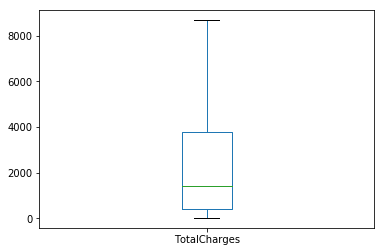

In [64]:
#check for outliers
data['TotalCharges'].plot.box()

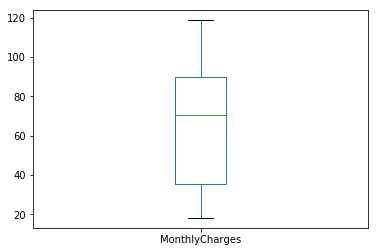

In [65]:
data['MonthlyCharges'].plot.box()

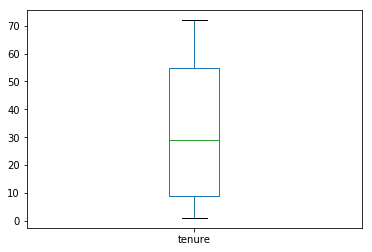

In [66]:
data['tenure'].plot.box()

No outliers in the continous data.

# Skewness

In [67]:
data[['tenure','TotalCharges','MonthlyCharges']].skew()

tenure            0.237731
TotalCharges      0.961642
MonthlyCharges   -0.222103
dtype: float64

TotalCharges is skewed .It has to be treated.

# Encoding

Target variable 'Churn' and the categorical features that have 2 unique categories can be label encoded.

In [68]:
list_LE=['gender','SeniorCitizen','Partner', 'Dependents','PhoneService','PaperlessBilling','Churn']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list_LE:
    data[i]=le.fit_transform(data[i])

In [69]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


The other categorical columns have to be one hot encoded

In [70]:
data.shape

(7032, 21)

In [71]:
#Use get_dummies to convert the categorical data to numericals
data_dummies=[]
for j in ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'Contract','PaymentMethod']:
    data_dummies.append(pd.get_dummies(data[j],drop_first=True, prefix = j, prefix_sep = ':'))
data_dummies=pd.concat(data_dummies,axis=1)

In [72]:
data=pd.concat([data,data_dummies],axis=1)

In [73]:
data.drop(columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'Contract','PaymentMethod'],axis=1,inplace=True)

All the columns are encoded.

# Correlation

In [74]:
data[['tenure','TotalCharges','MonthlyCharges','Churn']].corr()

,tenure,TotalCharges,MonthlyCharges,Churn
tenure,1.000000,0.825880,0.246862,-0.354049
TotalCharges,0.825880,1.000000,0.651065,-0.199484
MonthlyCharges,0.246862,0.651065,1.000000,0.192858
Churn,-0.354049,-0.199484,0.192858,1.000000


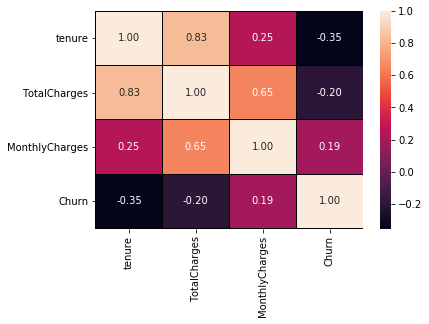

In [75]:
sns.heatmap(data[['tenure','TotalCharges','MonthlyCharges','Churn']].corr(),annot=True,linewidth=0.1,linecolor='Black',fmt='0.2f')

High correlation between Tenure and TotalCharges is understandable. But the high correlation between TotalCharges and MonthlyCharges may bring in 
multicollinearity. Infact Tenure*MonthlyCharges=TotalCharges. So TotalCharges can be removed.

Also customerID is of no use.

In [76]:
data.drop(columns=['customerID','TotalCharges'],axis=1,inplace=True)

Separate the target variable from the dataset

In [77]:
x=data.drop(columns='Churn')
y=data['Churn']

In [78]:
x.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,MultipleLines:No phone service,MultipleLines:Yes,InternetService:Fiber optic,InternetService:No,OnlineSecurity:No internet service,OnlineSecurity:Yes,OnlineBackup:No internet service,OnlineBackup:Yes,DeviceProtection:No internet service,DeviceProtection:Yes,TechSupport:No internet service,TechSupport:Yes,StreamingTV:No internet service,StreamingTV:Yes,StreamingMovies:No internet service,StreamingMovies:Yes,Contract:One year,Contract:Two year,PaymentMethod:Credit card (automatic),PaymentMethod:Electronic check,PaymentMethod:Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,0.096701,0.421928,0.440273,0.216155,0.216155,0.286547,0.216155,0.344852,0.216155,0.343857,0.216155,0.290102,0.216155,0.384386,0.216155,0.388367,0.209329,0.239619,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,0.295571,0.493902,0.496455,0.411650,0.411650,0.452180,0.411650,0.475354,0.411650,0.475028,0.411650,0.453842,0.411650,0.486484,0.411650,0.487414,0.406858,0.426881,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There is difference in range of values with respect to tenure and MonthlyCharges. Scaling has to be done.

# Scaling

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x[['tenure','MonthlyCharges']]=scaler.fit_transform(x[['tenure','MonthlyCharges']])

In [80]:
x.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,MultipleLines:No phone service,MultipleLines:Yes,InternetService:Fiber optic,InternetService:No,OnlineSecurity:No internet service,OnlineSecurity:Yes,OnlineBackup:No internet service,OnlineBackup:Yes,DeviceProtection:No internet service,DeviceProtection:Yes,TechSupport:No internet service,TechSupport:Yes,StreamingTV:No internet service,StreamingTV:Yes,StreamingMovies:No internet service,StreamingMovies:Yes,Contract:One year,Contract:Two year,PaymentMethod:Credit card (automatic),PaymentMethod:Electronic check,PaymentMethod:Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,0.442560,0.903299,0.592719,0.463166,0.096701,0.421928,0.440273,0.216155,0.216155,0.286547,0.216155,0.344852,0.216155,0.343857,0.216155,0.290102,0.216155,0.384386,0.216155,0.388367,0.209329,0.239619,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,0.345708,0.295571,0.491363,0.299363,0.295571,0.493902,0.496455,0.411650,0.411650,0.452180,0.411650,0.475354,0.411650,0.475028,0.411650,0.453842,0.411650,0.486484,0.411650,0.487414,0.406858,0.426881,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.112676,1.000000,0.000000,0.172512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.394366,1.000000,1.000000,0.518408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.760563,1.000000,1.000000,0.712562,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Imbalance

In [86]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [81]:
#Check the count of no churn and churn
round(y.value_counts(normalize=True)*100,2)

0    73.42
1    26.58
Name: Churn, dtype: float64

There is imbalance in the dataset. It can be treated with SMOTE

In [82]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,Y=sm.fit_resample(x,y)

In [83]:
X.shape

(10326, 29)

In [85]:
Y.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

# Fitting Models

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score

# Logistic Regression

In [104]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
pred=lgr.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred))
print('confusion matrix \n',confusion_matrix(y_test,pred))
print('\n classification report \n',classification_report(y_test,pred))

accuracy score 0.8056810845706908
confusion matrix 
 [[1188  354]
 [ 248 1308]]

 classification report 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      1542
           1       0.79      0.84      0.81      1556

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098



Cross- Validation

In [105]:
score=cross_val_score(lgr,X,Y,cv=8)
print(score.mean(),'difference b/w accuracy score and cv score is ',round(accuracy_score(y_test,pred)-score.mean(),3))


0.7933426254510956 difference b/w accuracy score and cv score is  0.012


# Decision Tree Classifier

In [106]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred))
print('confusion matrix \n',confusion_matrix(y_test,pred))
print('\n classification report \n',classification_report(y_test,pred))

accuracy score 0.7782440284054228
confusion matrix 
 [[1183  359]
 [ 328 1228]]

 classification report 
               precision    recall  f1-score   support

           0       0.78      0.77      0.77      1542
           1       0.77      0.79      0.78      1556

    accuracy                           0.78      3098
   macro avg       0.78      0.78      0.78      3098
weighted avg       0.78      0.78      0.78      3098



Cross Validation

In [107]:
score=cross_val_score(dtc,X,Y,cv=8)
print(score.mean(),'difference b/w accuracy score and cv score is ',round(accuracy_score(y_test,pred)-score.mean(),3))


0.7770738385603372 difference b/w accuracy score and cv score is  0.001


# KNN Classifier

In [108]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred))
print('confusion matrix \n',confusion_matrix(y_test,pred))
print('\n classification report \n',classification_report(y_test,pred))

accuracy score 0.7782440284054228
confusion matrix 
 [[1183  359]
 [ 328 1228]]

 classification report 
               precision    recall  f1-score   support

           0       0.78      0.77      0.77      1542
           1       0.77      0.79      0.78      1556

    accuracy                           0.78      3098
   macro avg       0.78      0.78      0.78      3098
weighted avg       0.78      0.78      0.78      3098



Cross Validation

In [109]:
score=cross_val_score(knn,X,Y,cv=8)
print(score.mean(),'difference b/w accuracy score and cv score is ',round(accuracy_score(y_test,pred)-score.mean(),3))


0.7989584271552008 difference b/w accuracy score and cv score is  -0.021


# Support Vector Machine Classifier

In [112]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred=svc.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred))
print('confusion matrix \n',confusion_matrix(y_test,pred))
print('\n classification report \n',classification_report(y_test,pred))

accuracy score 0.8018076178179471
confusion matrix 
 [[1122  420]
 [ 194 1362]]

 classification report 
               precision    recall  f1-score   support

           0       0.85      0.73      0.79      1542
           1       0.76      0.88      0.82      1556

    accuracy                           0.80      3098
   macro avg       0.81      0.80      0.80      3098
weighted avg       0.81      0.80      0.80      3098



In [111]:
score=cross_val_score(svc,X,Y,cv=8)
print(score.mean(),'difference b/w accuracy score and cv score is ',round(accuracy_score(y_test,pred)-score.mean(),3))


0.7994458505214994 difference b/w accuracy score and cv score is  0.002


# Random Forest Classifier

In [116]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred))
print('confusion matrix \n',confusion_matrix(y_test,pred))
print('\n classification report \n',classification_report(y_test,pred))

accuracy score 0.8440929632020658
confusion matrix 
 [[1258  284]
 [ 199 1357]]

 classification report 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1542
           1       0.83      0.87      0.85      1556

    accuracy                           0.84      3098
   macro avg       0.85      0.84      0.84      3098
weighted avg       0.85      0.84      0.84      3098



Cross Validation

In [114]:
score=cross_val_score(rf,X,Y,cv=8)
print(score.mean(),'difference b/w accuracy score and cv score is ',round(accuracy_score(y_test,pred)-score.mean(),3))


0.8433144788908303 difference b/w accuracy score and cv score is  0.001


# Gradient Boosting

In [117]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred))
print('confusion matrix \n',confusion_matrix(y_test,pred))
print('\n classification report \n',classification_report(y_test,pred))

accuracy score 0.8127824402840542
confusion matrix 
 [[1180  362]
 [ 218 1338]]

 classification report 
               precision    recall  f1-score   support

           0       0.84      0.77      0.80      1542
           1       0.79      0.86      0.82      1556

    accuracy                           0.81      3098
   macro avg       0.82      0.81      0.81      3098
weighted avg       0.82      0.81      0.81      3098



Cross Validation

In [118]:
score=cross_val_score(gbc,X,Y,cv=8)
print(score.mean(),'difference b/w accuracy score and cv score is ',round(accuracy_score(y_test,pred)-score.mean(),3))


0.8024457484433076 difference b/w accuracy score and cv score is  0.01


# From the above Random Forest Classifier is choosen as the best model

# Hyper Parameter Tuning of Random Forest Classifier

In [120]:
from sklearn.model_selection import GridSearchCV
params={'max_features':['auto','sqrt','log2'],'n_estimators':[10,100,1000],'criterion':['gini','entropy'],'max_depth':[8,16,32],'min_samples_split':[5,10,15]}
model=RandomForestClassifier()
grid=GridSearchCV(estimator=model,param_grid=params,cv=5)
grid.fit(X,Y)
print(grid.best_score_)
print(grid.best_params_)


0.8377916644203746
{'criterion': 'entropy', 'max_depth': 32, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 100}


Fit the data with the above parameters

In [122]:
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth= 32,max_features='log2',min_samples_split= 5)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred))
print('confusion matrix \n',confusion_matrix(y_test,pred))
print('\n classification report \n',classification_report(y_test,pred))

accuracy score 0.8395739186571982
confusion matrix 
 [[1245  297]
 [ 200 1356]]

 classification report 
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      1542
           1       0.82      0.87      0.85      1556

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098



There is no much improvement in the accuracy due to hyper parameter tuning

In [124]:
score=cross_val_score(rf,X,Y,cv=8)
print(score.mean(),'difference b/w accuracy score and cv score is ',round(accuracy_score(y_test,pred)-score.mean(),3))

0.8367299851686392 difference b/w accuracy score and cv score is  0.003


# ROC-AUC Curve

In [125]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

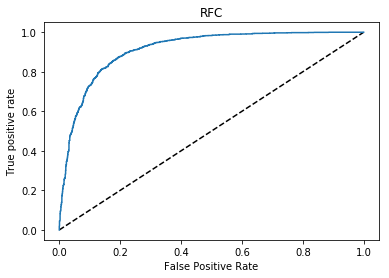

In [126]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.title('RFC')
plt.show()

In [127]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))
auc_score

0.8394291458693848

# Saving The Model

In [128]:
import joblib
joblib.dump(rf,'rffile.obj')
rf_from_joblib=joblib.load('rffile.obj')
rf_from_joblib.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1])

In [129]:
rf_from_joblib.score(x_test,y_test)

0.8395739186571982